In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
columns = [columns for columns in df.columns]
columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in columns:
    df[col] = encoder.fit_transform(df[col])

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


dt = DecisionTreeClassifier(random_state=101)
ada = AdaBoostClassifier(random_state=101)

In [9]:
dt.fit(X_train, y_train)
ada.fit(X_train, y_train)

dt.score(X_test, y_test), ada.score(X_test, y_test)

(1.0, 1.0)

Text(0.5, 1.0, 'Feature Importances for Decision Tree Classifier')

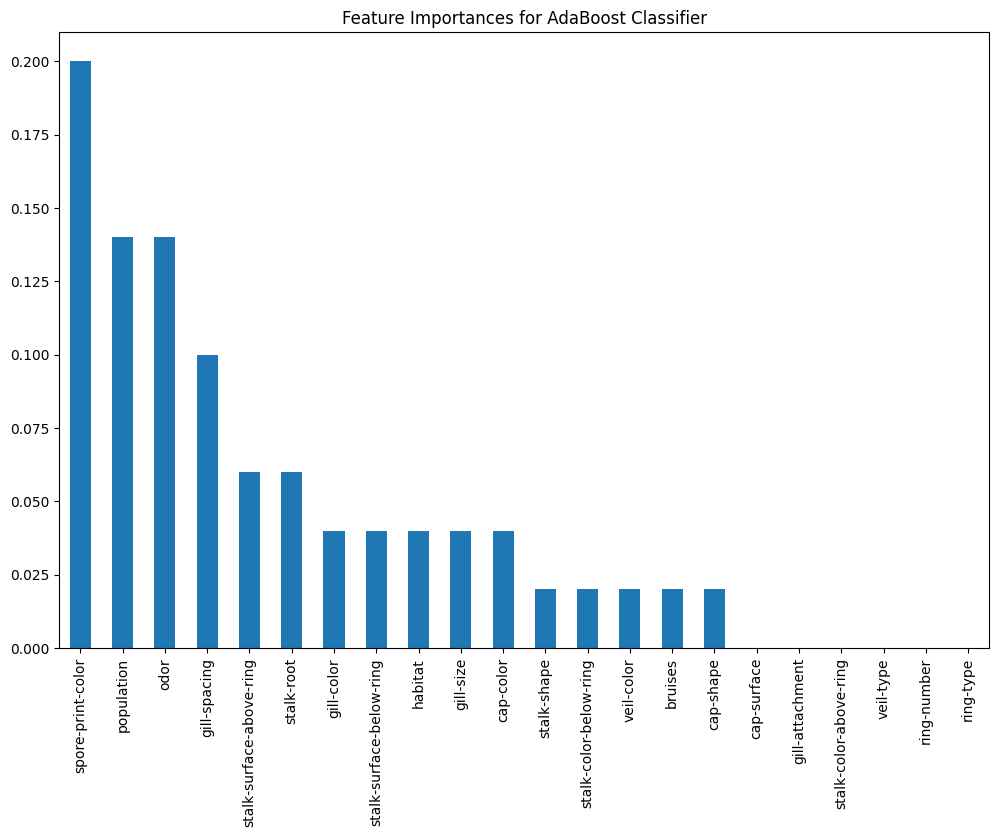

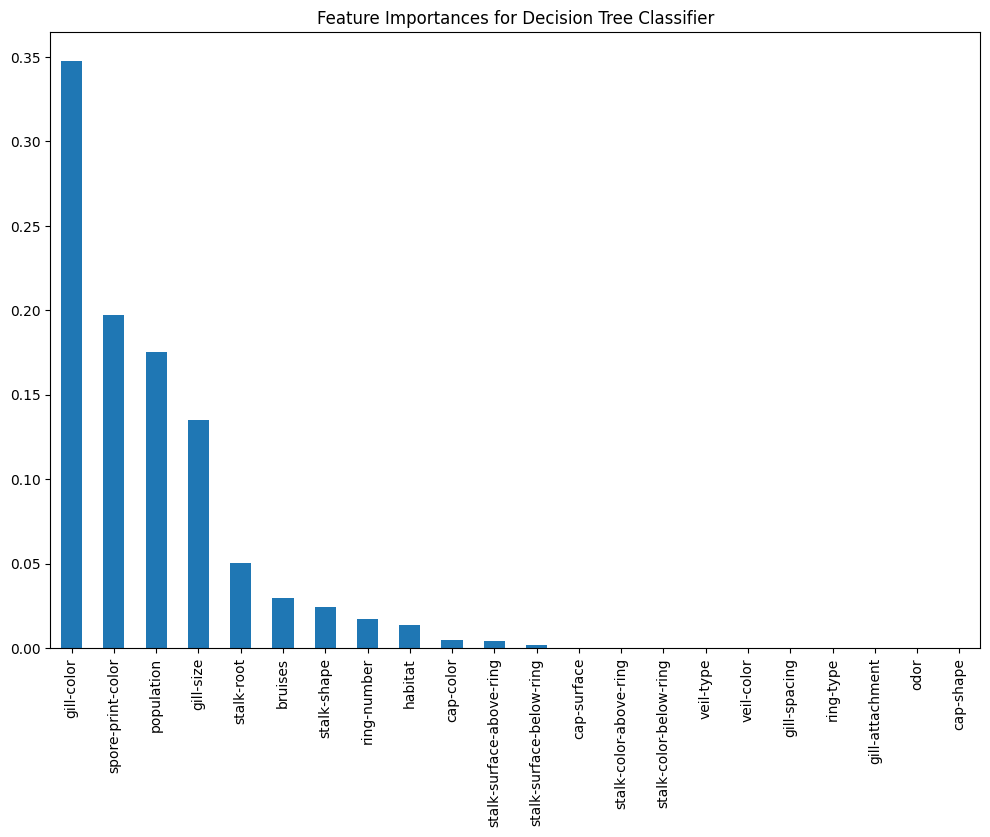

In [12]:
# plot feature importances
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(12, 8))
pd.Series(ada.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances for AdaBoost Classifier')
plt.subplots(figsize=(12, 8))
pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances for Decision Tree Classifier')